In [1]:
import os
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils')
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')
import alloptical_utils_pj as aoutils
import glob
import STAMovieMaker_noGUI as STAMM

In [2]:
## import expobj

###### IMPORT pkl file containing expobj
trial = 't-010'
date = '2021-01-08'
pkl_path = "/home/pshah/mnt/qnap/Analysis/%s/%s_%s/%s_%s.pkl" % (date, date, trial, date, trial)
# pkl_path = "/home/pshah/mnt/qnap/Data/%s/%s_%s/%s_%s.pkl" % (date, date, trial, date, trial)

expobj, experiment = aoutils.import_expobj(trial=trial, date=date, pkl_path=pkl_path)


importing expobj for "2021-01-08, t-010" from: /home/pshah/mnt/qnap/Analysis/2021-01-08/2021-01-08_t-010/2021-01-08_t-010.pkl


DONE IMPORT of PS05: t-010, pre 4ap 2p all optical, moved FOV back to original location. 32 cells x 1 groups; 7mW per cell, 250ms stim (prot. #1b)


## Define QNAP and save path

In [3]:
expobj.metainfo

{'animal prep.': 'PS05',
 'trial': 't-010',
 'date': '2021-01-08',
 'exptype': 'pre 4ap 2p all optical',
 'data_path_base': '/home/pshah/mnt/qnap/Data/2021-01-08',
 'comments': 'moved FOV back to original location. 32 cells x 1 groups; 7mW per cell, 250ms stim (prot. #1b)'}

In [4]:
qnap_path = os.path.expanduser('/home/pshah/mnt/qnap')

## data path
movie_path = expobj.tiff_path 
sync_path = expobj.paq_path

## stamm save path
stam_save_path = os.path.join(qnap_path, 'Analysis', expobj.metainfo['date'], 'STA_Movies', '%s_%s_%s' % (expobj.metainfo['date'],
                                                                                expobj.metainfo['animal prep.'],
                                                                                expobj.metainfo['trial']))
os.makedirs(stam_save_path, exist_ok=True)


##
assert os.path.exists(stam_save_path)

print('QNAP_path:', qnap_path,
      '\ndata path:', movie_path,
      '\nsync path:', sync_path,
      '\nSTA movie save path:', stam_save_path)

QNAP_path: /home/pshah/mnt/qnap 
data path: /home/pshah/mnt/qnap/Data/2021-01-08/2021-01-08_t-010/2021-01-08_t-010_Cycle00001_Ch3.tif 
sync path: /home/pshah/mnt/qnap/Data/2021-01-08/2021-01-08_PS05_010.paq 
STA movie save path: /home/pshah/mnt/qnap/Analysis/2021-01-08/STA_Movies/2021-01-08_PS05_t-010


## Define settings and check image/paq paths for STAMovieMaker

In [5]:
numDiffStims = 2
startOnStim = 1
everyXStims = 2
preSeconds = 0.75
postSeconds = 2.25
frameRate = int(expobj.fps)



arg_dict = {'moviePath' : movie_path, # hard-code this
            'savePath' : stam_save_path,
            'syncFrameChannel' : 'frame_clock',
            'syncStimChannel' : 'packio2markpoints',
            'syncStartSec' : 0,
            'syncStopSec' : 0,
            'numDiffStims' : numDiffStims,
            'startOnStim' : startOnStim,
            'everyXStims' : everyXStims,
            'preSeconds' : preSeconds,
            'postSeconds' : postSeconds,
            'frameRate' : frameRate,
            'averageImageStart' : 0.5,
            'averageImageStop' : 1.5,
            'methodDF' : False,
            'methodDFF' : True,
            'methodZscore' : False,
            'syncPath' : sync_path,
            'zPlanes' : 1,
            'useStimOrder' : False,
            'stimOrder' : [],
            'useSingleTrials' : False,
            'doThreshold' : False,
            'threshold' : 0,
            'colourByTime' : False,
            'useCorrelationImage' : False,
            'blurHandS' : False,
            'makeMaxImage' : True,
            'makeColourImage' : False
           }

## Run STA Movie Maker

In [6]:
STAMM.STAMovieMaker(arg_dict);

Loading sync file
Loading movie
Plane 1 of 1. Stim 1 of 2 (50 trials)
Plane 1 of 1. Stim 1 of 2 (50 trials) - Raw
Plane 1 of 1. Stim 1 of 2 (50 trials) - dFF
Plane 1 of 1. Stim 2 of 2 (50 trials)
Plane 1 of 1. Stim 2 of 2 (50 trials) - Raw
Plane 1 of 1. Stim 2 of 2 (50 trials) - dFF


## Load STA Images

In [7]:
img = glob.glob(stam_save_path+'/*MaxResponseImage.tif')[0]

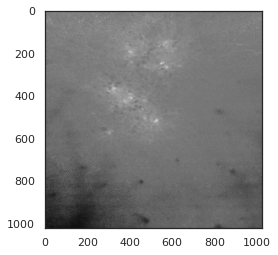

array([[ 10.019731 ,   0.4995279,   1.6475985, ...,   5.5761766,
          4.356878 ,  11.628178 ],
       [ -0.8186494,   4.0406947,   4.6368027, ...,   1.1760145,
         32.99858  ,  10.191082 ],
       [  7.9871974,  11.075018 ,  18.635885 , ...,  19.704317 ,
         41.858986 ,  24.382488 ],
       ...,
       [-79.582    , -77.1913   , -80.37381  , ..., -27.954916 ,
        -41.305103 , -28.587719 ],
       [-68.9329   , -81.76561  , -75.9089   , ..., -30.020662 ,
        -33.656796 , -36.109627 ],
       [-83.33131  , -81.46988  , -72.45516  , ..., -19.591583 ,
        -25.716759 , -34.991825 ]], dtype=float32)

In [8]:
aoutils.plot_single_tiff(img)

## Troubleshooting

In [9]:
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')
from utils import paq_utils
print(sync_path)

/home/pshah/mnt/qnap/Data/2021-01-08/2021-01-08_PS05_010.paq


In [10]:
paq, _ = paq_utils.paq_read(sync_path, plot=False)

In [11]:
paq['chan_names']

['frame_clock',
 'x_galvo_uncaging',
 'slm2packio',
 'markpoints2packio',
 'packio2slm',
 'packio2markpoints',
 'pycontrol_rsync',
 'voltage']